In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [9]:
df=pd.read_csv('data/gemstone.csv')

In [10]:
df.isnull().sum()  #checking missing values

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       19999 non-null  int64  
 1   carat    19999 non-null  float64
 2   cut      19999 non-null  object 
 3   color    19999 non-null  object 
 4   clarity  19999 non-null  object 
 5   depth    19999 non-null  float64
 6   table    19999 non-null  float64
 7   x        19999 non-null  float64
 8   y        19999 non-null  float64
 9   z        19999 non-null  float64
 10  price    19999 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


In [12]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [13]:
df=df.drop(labels=['id'],axis=1) #dropping 'id' column

In [14]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [15]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19994    False
19995    False
19996    False
19997    False
19998    False
Length: 19999, dtype: bool

In [16]:
df.duplicated().sum()

0

In [17]:
#segregating numerical and categorical data
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']

In [18]:
df[categorical_columns].describe()

,cut,color,clarity
count,19999,19999,19999
unique,5,7,8
top,Ideal,G,SI1
freq,9579,4623,5418


In [19]:
df['cut'].value_counts()

cut
Ideal        9579
Premium      5148
Very Good    3852
Good         1204
Fair          216
Name: count, dtype: int64

In [20]:
df['color'].value_counts()

color
G    4623
E    3619
F    3518
H    3193
D    2564
I    1853
J     629
Name: count, dtype: int64

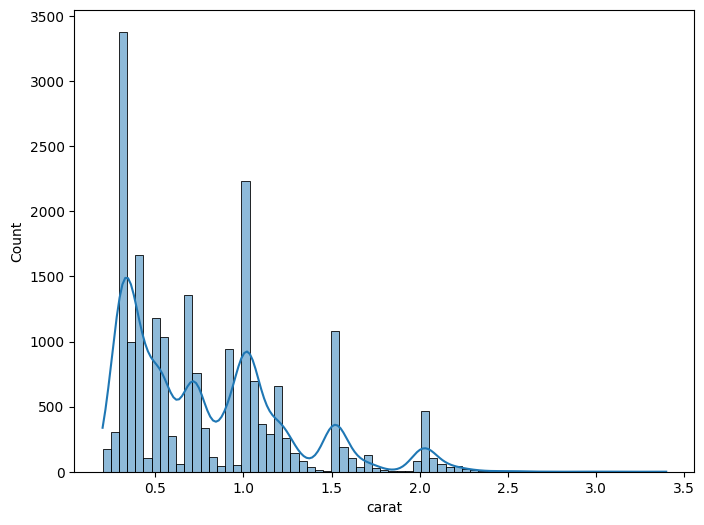

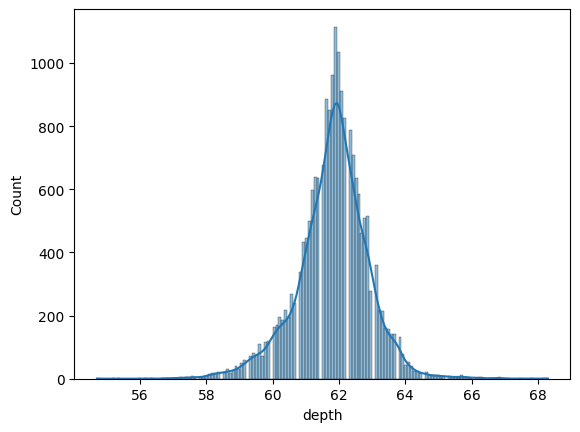

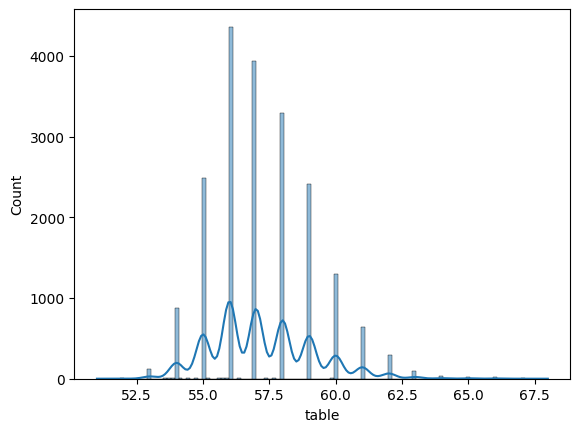

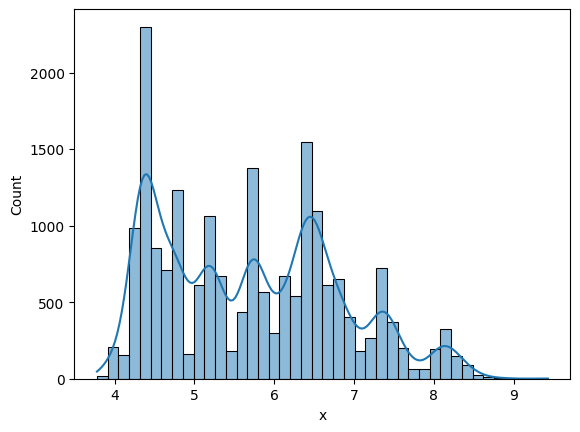

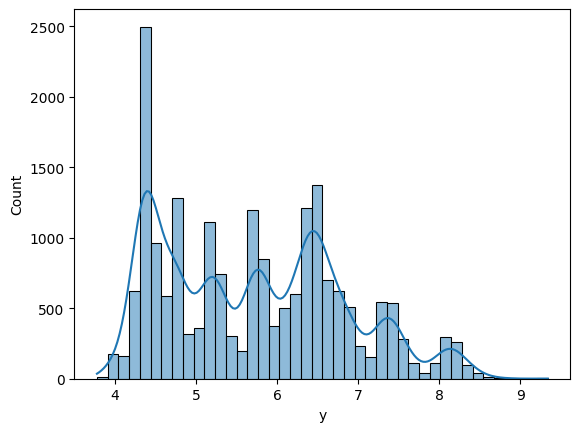

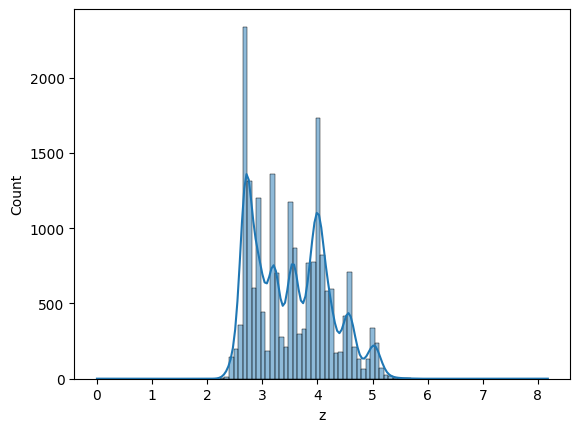

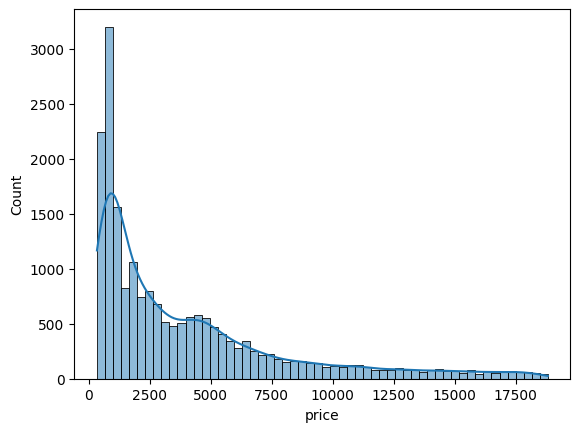

In [21]:
plt.figure(figsize=(8,6))
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print("\n")
    plt.show()

<Axes: >

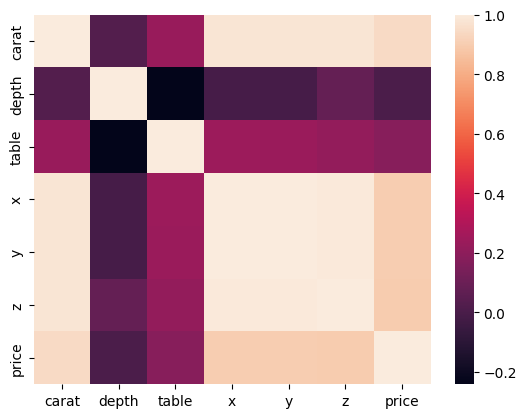

In [22]:
sns.heatmap(df[numerical_columns].corr())   #for checking correlation in numerical columns

<Axes: >

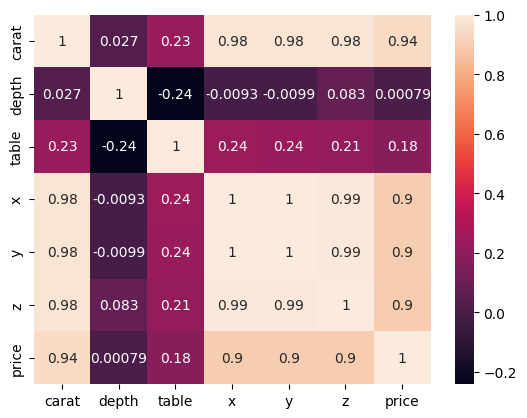

In [23]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

### by analysing above diagram we can conclude x,y,z are highly correlated to each other

c:\gemstoneprediction\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


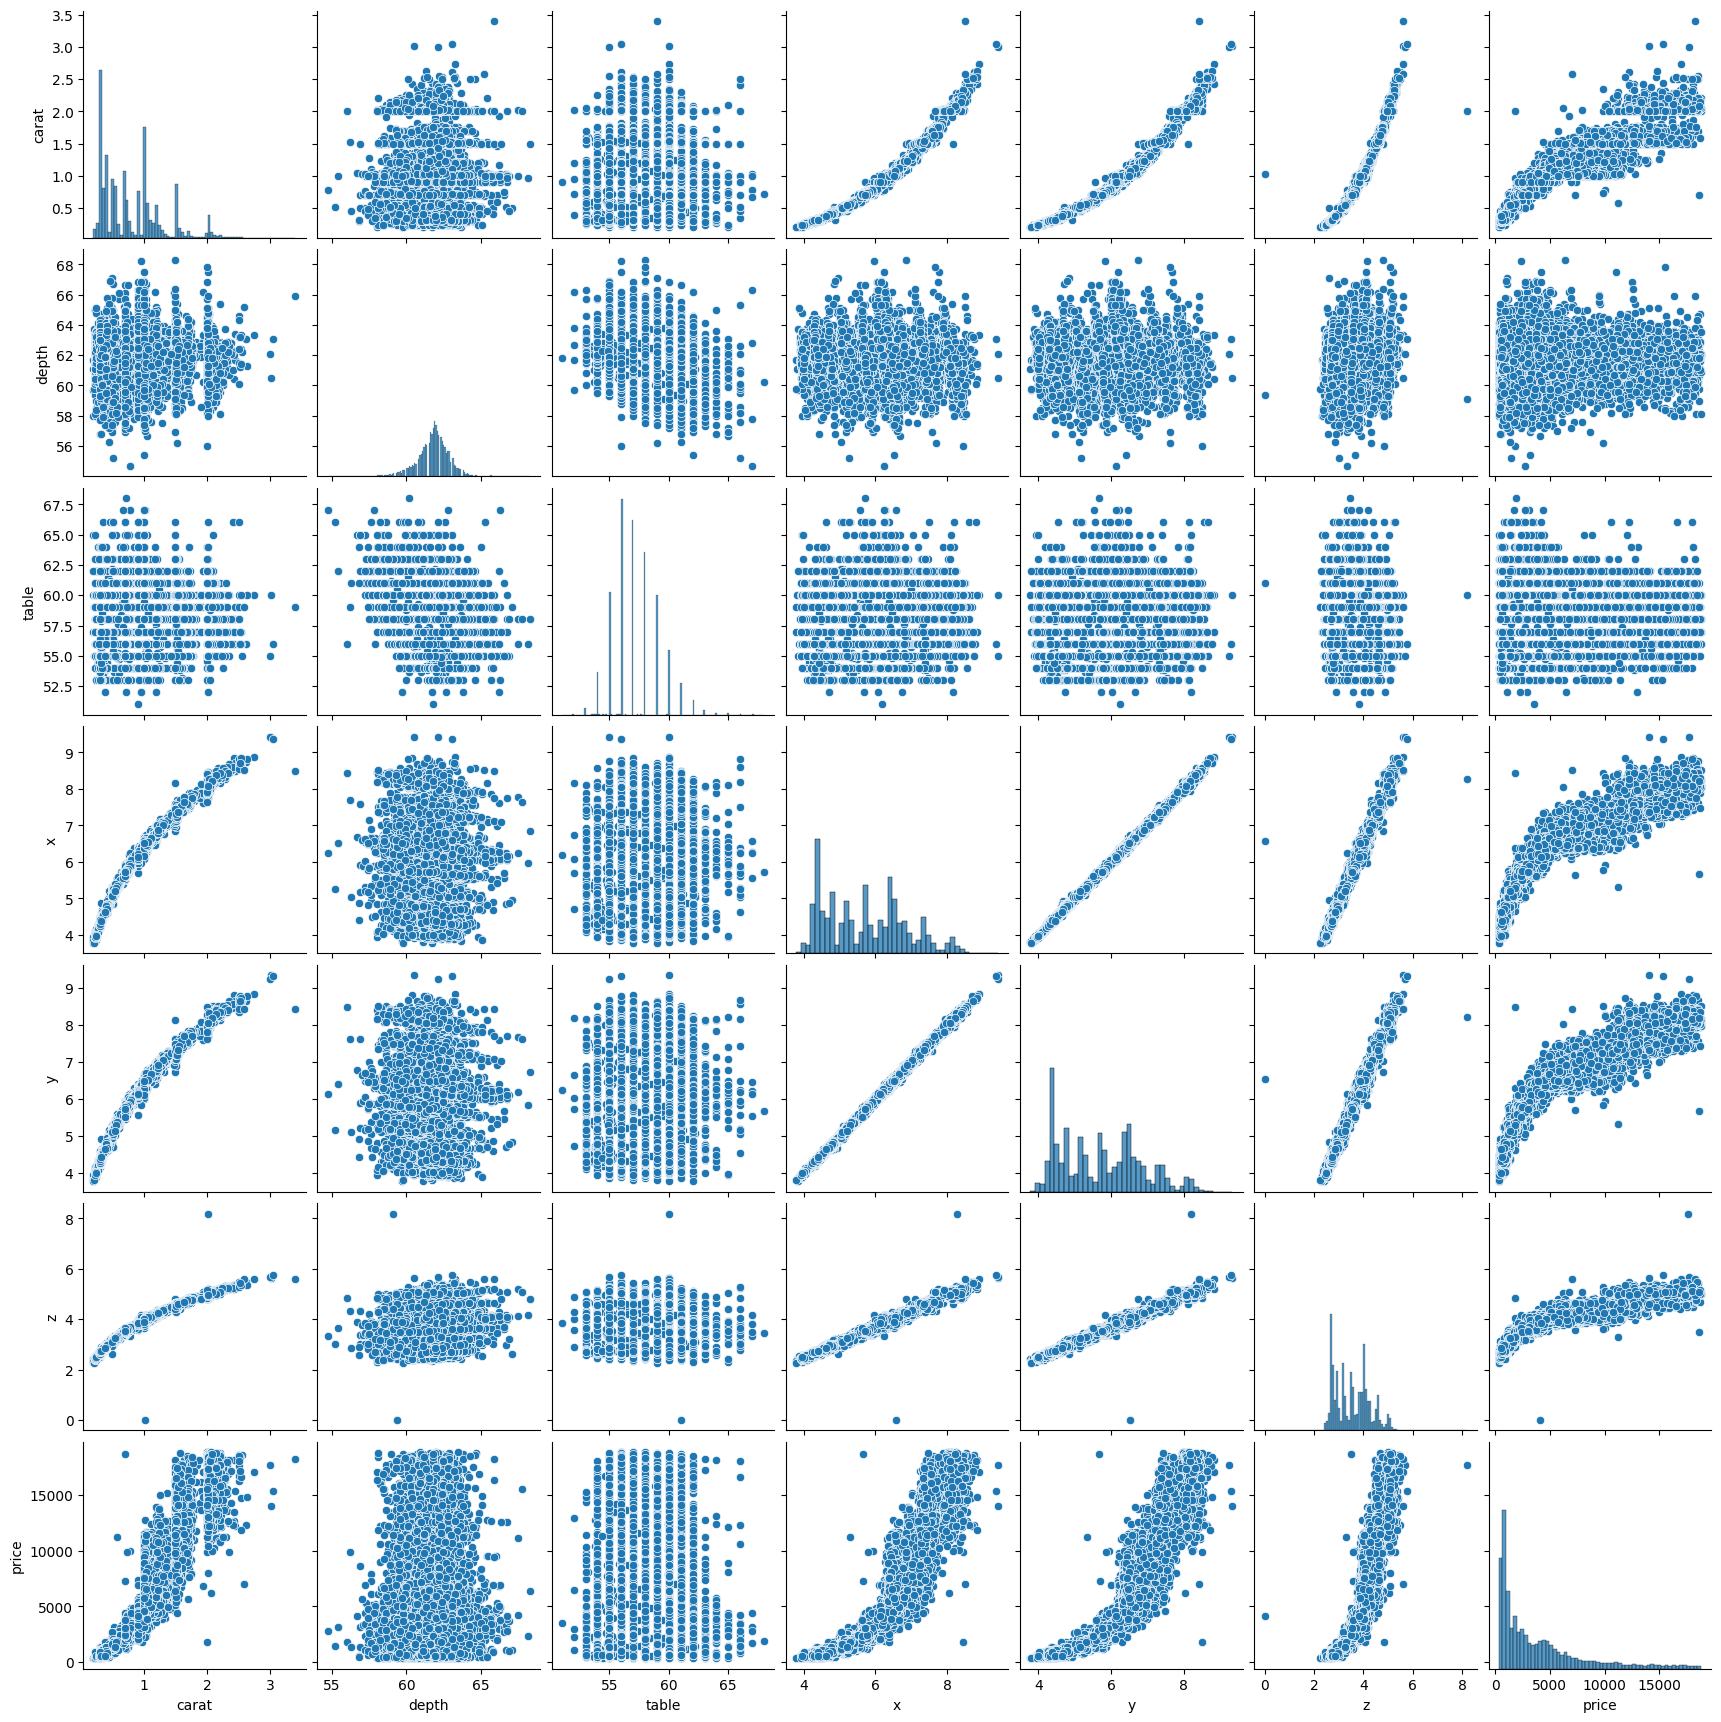

In [24]:
sns.pairplot(df)

In [25]:
# from above graphs we can conclude there is a positive correlation 

In [26]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

### #converting categorical data into numerical

In [27]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}  

In [28]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [29]:
clarity_map={"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}

In [30]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [31]:
color_map={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

In [32]:
df['cut']=df['cut'].replace(cut_map)

In [33]:
df['color']=df['color'].replace(color_map)

In [34]:
df['clarity']=df['clarity'].replace(clarity_map)

In [35]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
